# DENGUE ARIMA MODEL

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error

In [8]:
# read in pickle
df_iq = pd.read_pickle('./datasets/df_iq.pkl')
df_sj = pd.read_pickle('./datasets/df_sj.pkl')

# create month variable
df_sj['month'] = df_sj.index.month
df_iq['month'] = df_iq.index.month

# train test split
#sj
sj_train = df_sj.loc[:'2007-04-20']
sj_Xtrain = sj_train.drop('total_cases', axis = 1)
sj_ytrain = sj_train[['total_cases']]

sj_test = df_sj.loc['2007-04-20':]
sj_Xtest = sj_test.drop('total_cases', axis = 1)
sj_ytest = sj_test[['total_cases']]

#iq
iq_train = df_iq.loc[:'2009-06-20']
iq_Xtrain = iq_train.drop('total_cases', axis = 1)
iq_ytrain = iq_train[['total_cases']]

iq_test = df_iq.loc['2009-06-20':]
iq_Xtest = iq_test.drop('total_cases', axis = 1)
iq_ytest = iq_test[['total_cases']]


## Build ARIMA Model

In [9]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

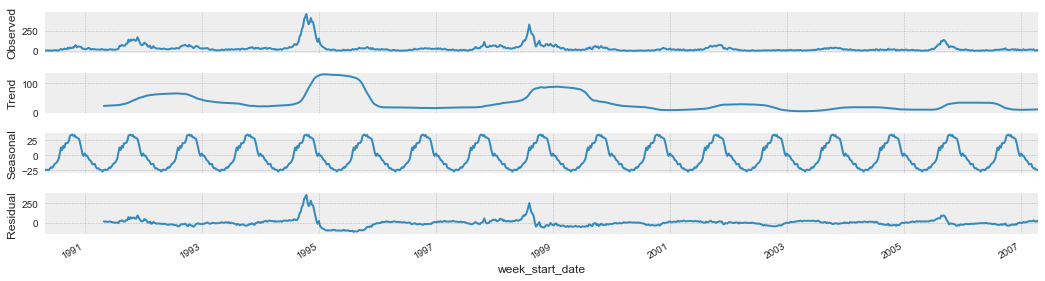

In [20]:
# Plot the decomposition time-series trend
# 52 because there are 52 weeks in a year

decomposition = seasonal_decompose(sj_ytrain, two_sided=False, freq=52)
fig = plt.figure()
fig = decomposition.plot()  
fig.set_size_inches(16, 4)

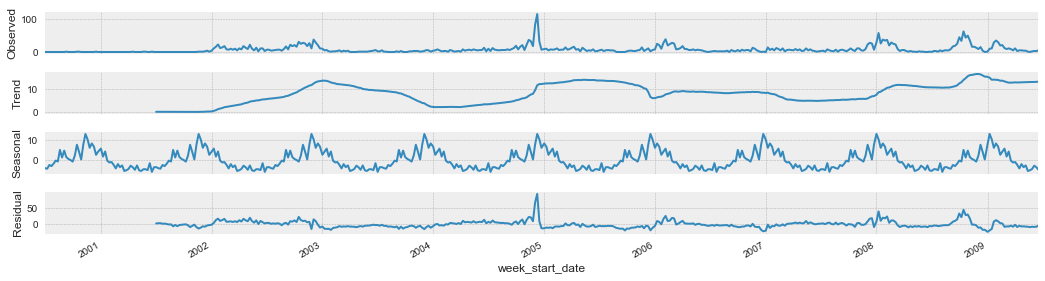

In [21]:
decomposition = seasonal_decompose(iq_ytrain, two_sided=False, freq=53)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(16, 4)

## RESIDUALS HERE ARE IMPORTANT

Can use weather features to predict when caseload will be above or below seasonal trend!!

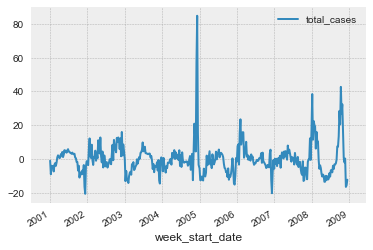

In [74]:
residuals = decomposition.resid
residuals.plot()

# Why is the seasonal trend negative? that doesnt make sense to me.
# use linear monthly model for trend and create residual predictions around that, not this